In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_NN.csv")
df["class"] = df["class"] - 1
df.head()
df.shape

(2000, 7)

In [ ]:
df = df.sample(frac=1)
df.head()

,att1,att2,att3,att4,att5,att6,class
247,0.0,2.0,0.0,141.528861,1.421352,4289.400470,1
1978,1.0,1.0,1.0,135.044861,1.339365,3242.808674,9
1651,2.0,0.0,2.0,140.552861,1.313638,2327.407319,8
681,0.0,3.0,0.0,143.142861,1.546225,5338.505378,3
1177,0.0,3.0,1.0,191.159861,1.986360,12188.133665,5


In [ ]:
df_minmax = (df - df.min())/(df.max() - df.min())
df_minmax.head()

,att1,att2,att3,att4,att5,att6,class
247,0.0,0.333333,0.0,0.318894,0.196526,0.176652,0.111111
1978,0.5,0.166667,0.2,0.269686,0.138613,0.111778,1.000000
1651,1.0,0.000000,0.4,0.311487,0.120440,0.055036,0.888889
681,0.0,0.500000,0.0,0.331143,0.284732,0.241682,0.333333
1177,0.0,0.500000,0.2,0.695548,0.595628,0.666263,0.555556


In [ ]:
df_train_norm = df_minmax[0:1400]
df_test_norm = df_minmax[1400:]

df_train = df[0:1400]
df_test = df[1400:]

In [ ]:
x_train = np.array(df_train.drop(columns="class"))
y_train = np.array(df_train["class"])

x_train_norm = np.array(df_train_norm.drop(columns="class"))
y_train_norm = np.array(df_train["class"])

x_test = np.array(df_test.drop(columns="class"))
y_test = np.array(df_test["class"])

x_test_norm = np.array(df_test_norm.drop(columns="class"))
y_test_norm = np.array(df_test["class"])

In [ ]:
y_train

array([1, 9, 8, ..., 0, 1, 9])

In [ ]:
x_train = x_train.T
x_test = x_test.T

x_train_norm = x_train_norm.T
x_test_norm = x_test_norm.T

In [ ]:
input_size = 6
hl_1 = 100
hl_2 = 100
output_size = 10

In [ ]:
def init_params_1():
  W1 = np.random.rand(hl_1, input_size) - 0.5
  b1 = np.zeros(shape=(hl_1, 1))
  W2 = np.random.rand(output_size, hl_1) - 0.5
  b2 = np.zeros(shape=(output_size, 1))
  return W1, b1, W2, b2;

In [ ]:
def init_params_2():
  W1 = np.random.rand(hl_1, input_size)-0.5
  b1 = np.zeros(shape=(hl_1, 1))
  W2 = np.random.rand(hl_2, hl_1)-0.5
  b2 = np.zeros(shape=(hl_2, 1))
  W3 = np.random.rand(output_size, hl_2)-0.5
  b3 = np.zeros(shape=(output_size, 1))
  return W1, b1, W2, b2, W3, b3

In [ ]:
def relu(X):
  return np.maximum(X, 0)

In [ ]:
def softmax(X):
  fx = np.exp(X)
  return fx / fx.sum(axis=0)

In [ ]:
def diff_relu(X):
  return X > 0

In [ ]:
def tanh(X):
  fx = np.tanh(X)
  return fx

In [ ]:
def diff_tanh(X):
  return 1 - (tanh(X)*tanh(X))

In [ ]:
def one_hot(Y):
  one_hot_y = np.zeros((Y.size, 10))
  one_hot_y[np.arange(Y.size), Y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y

In [ ]:
def softmaxCost(A, Y):    
  loss_sum = 0
  for i in range(Y.shape[0]):
    loss_sum += np.log(A[Y[i]][i])*-1
  return loss_sum/Y.shape[0]

In [ ]:
def forward_prop_1(W1, b1, W2, b2, X, func):
  Z1 = W1.dot(X) + b1
  if(func == "tanh"):
    A1 = tanh(Z1)
  elif(func == "relu"):
    A1 = relu(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

In [ ]:
def forward_prop_2(W1, b1, W2, b2, W3, b3, X, func1, func2):
  Z1 = W1.dot(X) + b1
  if(func1 == "tanh"):
    A1 = tanh(Z1)
  elif(func1 == "relu"):
    A1 = relu(Z1)
  Z2 = W2.dot(A1) + b2
  if(func2 == "tanh"):
    A2 = tanh(Z2)
  elif(func2 == "relu"):
    A2 = relu(Z2)
  Z3 = W3.dot(A2) + b3
  A3 = softmax(Z3)
  return Z1, A1, Z2, A2, Z3, A3

In [ ]:
def backward_prop_1(Z1, A1, Z2, A2, W2, X, Y, func):
  div = Y.size
  one_hot_y = one_hot(Y)
  dZ2 = A2 - one_hot_y
  dW2 = (1/div)*dZ2.dot(A1.T)
  db2 = (1/div)*np.sum(dZ2)
  #dZ1 = W2.T.dot(dZ2)
  if(func == "tanh"):
    dZ1 = W2.T.dot(dZ2) * diff_tanh(Z1)
  elif(func == "relu"):
    dZ1 = W2.T.dot(dZ2) * diff_relu(Z1)
  dW1 = (1/div)*dZ1.dot(X.T)
  db1 = (1/div)*np.sum(dZ1)
  return dW1, db1, dW2, db2

In [ ]:
def backward_prop_2(Z1, A1, Z2, A2, W2, Z3, A3, W3, X, Y, func1, func2):
  div = Y.size
  one_hot_y = one_hot(Y)
  dZ3 = A3 - one_hot_y
  dW3 = (1/div)*dZ3.dot(A2.T)
  #print(dW3.shape, W3.shape)
  db3 = (1/div)*np.sum(dZ3)
  if(func2 == "tanh"):
    dZ2 = W3.T.dot(dZ3) * diff_tanh(Z2)
  elif(func2 == "relu"):
    dZ2 = W3.T.dot(dZ3) * diff_tanh(Z2)
  dW2 = (1/div)*dZ2.dot(A1.T)
  db2 = (1/div)*np.sum(dZ2)
  if(func1 == "tanh"):
    dZ1 = W2.T.dot(dZ2) * diff_tanh(Z1)
  elif(func1 == "relu"):
    dZ1 = W2.T.dot(dZ2) * diff_tanh(Z1)
  dW1 = (1/div)*dZ1.dot(X.T)
  db1 = (1/div)*np.sum(dZ1)
  return dW1, db1, dW2, db2, dW3, db3

In [ ]:
def update_params_1(W1, b1, W2, b2, dW1, db1, dW2, db2, lr):
  W1 = W1 - lr*dW1
  W2 = W2 - lr*dW2

  b1 = b1 - lr*db1
  b2 = b2 - lr*db2
  return W1, b1, W2, b2

In [ ]:
def update_params_2(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr):
  W1 = W1 - lr*dW1
  W2 = W2 - lr*dW2
  #print(dW3.shape, W3.shape)
  W3 = W3 - lr*dW3

  b1 = b1 - lr*db1
  b2 = b2 - lr*db2
  b3 = b3 - lr*db3
  return W1, b1, W2, b2, W3, b3

In [ ]:
def predict(Y):
  return np.argmax(Y, 0)

In [ ]:
def accuracy(y_actual, y_pred):
  return np.sum(y_pred == y_actual)/y_actual.shape[0]

In [ ]:
x_train.shape

(6, 1400)

In [ ]:
def nn_batch_descent_1(X, Y, iters, lr, batch_size):
  accs = []
  losses = []
  epoch = 0
  W1, b1, W2, b2 = init_params_1()
  batch_no = X.shape[1]/batch_size
  for i in range(iters+1):
    cur_pos = 0
    epoch_cost = 0
    while(cur_pos+batch_size < X.shape[1]):
      epoch += 1
      X_temp = X[:, cur_pos:cur_pos+batch_size]
      Y_temp = Y[cur_pos:cur_pos+batch_size]
      cur_pos += batch_size
      Z1, A1, Z2, A2 = forward_prop_1(W1, b1, W2, b2, X_temp, "relu")
      dW1, db1, dW2, db2 = backward_prop_1(Z1, A1, Z2, A2, W2, X_temp, Y_temp, "relu")
      W1, b1, W2, b2 = update_params_1(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
      Z1, A1, Z2, A2 = forward_prop_1(W1, b1, W2, b2, X, "relu")
      #print(A2.shape, Y_temp.shape)
      #cost = costSoftmax(A2, Y_temp)
      #epoch_cost += cost
    #batch_no = X.shape[1]/batch_size
    #dW1_m/=batch_no
    #dW2_m/=batch_no
    #db1_m/=batch_no
    #db2_m/=batch_no
    #W1, b1, W2, b2 = update_params_1(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
    if(i%50 == 0):
      acc = accuracy(Y, predict(A2))
      print("Accuracy after epoch", i, " = ", acc)
      loss = softmaxCost(A2, Y)
      print("Cost after epoch", i, " = ", softmaxCost(A2, Y))
      accs.append(acc)
      losses.append(loss)

  return W1, b1, W2, b2, accs, losses


In [ ]:
#Mini-batch gradient descent applied on 1 hidden layer
W1, b1, W2, b2, accs1, losses1 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.1, 100)

Accuracy after epoch 0  =  0.1757142857142857
Cost after epoch 0  =  2.1987249121069614
Accuracy after epoch 50  =  0.6921428571428572
Cost after epoch 50  =  0.9783463181776086
Accuracy after epoch 100  =  0.7
Cost after epoch 100  =  0.7706340177583773
Accuracy after epoch 150  =  0.7092857142857143
Cost after epoch 150  =  0.7112995616797626
Accuracy after epoch 200  =  0.7142857142857143
Cost after epoch 200  =  0.680403351714797
Accuracy after epoch 250  =  0.7235714285714285
Cost after epoch 250  =  0.6599301257533806
Accuracy after epoch 300  =  0.7321428571428571
Cost after epoch 300  =  0.643810046978082
Accuracy after epoch 350  =  0.7378571428571429
Cost after epoch 350  =  0.6302357753397232
Accuracy after epoch 400  =  0.745
Cost after epoch 400  =  0.6192123183009559
Accuracy after epoch 450  =  0.7485714285714286
Cost after epoch 450  =  0.6093980759303496
Accuracy after epoch 500  =  0.7507142857142857
Cost after epoch 500  =  0.6016047484680823
Accuracy after epoch 550

In [ ]:
def nn_batch_descent_2(X, Y, iters, lr, batch_size):
  accs = []
  losses = []
  epoch = 0
  W1, b1, W2, b2, W3, b3 = init_params_2()
  for i in range(iters + 1):
    cur_pos = 0
    while(cur_pos+batch_size < X.shape[1]):
      epoch += 1
      X_temp = X[:, cur_pos:cur_pos+batch_size]
      Y_temp = Y[cur_pos:cur_pos+batch_size]
      cur_pos += batch_size
      Z1, A1, Z2, A2, Z3, A3 = forward_prop_2(W1, b1, W2, b2, W3, b3, X_temp, "relu", "relu")
      dW1, db1, dW2, db2, dW3, db3 = backward_prop_2(Z1, A1, Z2, A2, W2, Z3, A3, W3, X_temp, Y_temp, "relu", "relu")
      W1, b1, W2, b2, W3, b3 = update_params_2(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, lr)
      Z1, A1, Z2, A2, Z3, A3 = forward_prop_2(W1, b1, W2, b2, W3, b3, X, "relu", "relu")
    #batch_no = X.shape[1]/batch_size
    #dW1_m/=batch_no
    #dW2_m/=batch_no
    #db1_m/=batch_no
    #db2_m/=batch_no
    #W1, b1, W2, b2 = update_params_1(W1, b1, W2, b2, dW1, db1, dW2, db2, lr)
    if(i%50 == 0):
      acc = accuracy(Y, predictions(A3))
      print("Accuracy at epoch", i, " = ", acc)
      loss = softmaxCost(A3, Y)
      print("Loss at epoch ", i, " = ", loss)
      accs.append(acc)
      losses.append(loss)

  return W1, b1, W2, b2, W3, b3, accs, losses

In [ ]:
#mini-batch gradient descent applied on 2 hidden layers
W1, b1, W2, b2, W3, b3, accs2, losses2 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.1, 150)

Accuracy at epoch 0  =  0.22428571428571428
Loss at epoch  0  =  2.17302799466028
Accuracy at epoch 50  =  0.7078571428571429
Loss at epoch  50  =  0.825589084288433
Accuracy at epoch 100  =  0.7207142857142858
Loss at epoch  100  =  0.7183116978770531
Accuracy at epoch 150  =  0.7221428571428572
Loss at epoch  150  =  0.6643117914684702
Accuracy at epoch 200  =  0.7214285714285714
Loss at epoch  200  =  0.642845400090858
Accuracy at epoch 250  =  0.7357142857142858
Loss at epoch  250  =  0.6279066009041392
Accuracy at epoch 300  =  0.7414285714285714
Loss at epoch  300  =  0.6102659019866576
Accuracy at epoch 350  =  0.7421428571428571
Loss at epoch  350  =  0.5904775638822193
Accuracy at epoch 400  =  0.7435714285714285
Loss at epoch  400  =  0.5812832755047717
Accuracy at epoch 450  =  0.7435714285714285
Loss at epoch  450  =  0.5736018904638824
Accuracy at epoch 500  =  0.745
Loss at epoch  500  =  0.5699193300116947
Accuracy at epoch 550  =  0.7464285714285714
Loss at epoch  550  

In [ ]:
#stochastic gradient descent (?) for neural network with 1 hidden layer
W1, b1, W2, b2, accs1, losses1 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.1, 1)

Accuracy after epoch 0  =  0.6014285714285714
Cost after epoch 0  =  1.124591597277329


KeyboardInterrupt: ignored

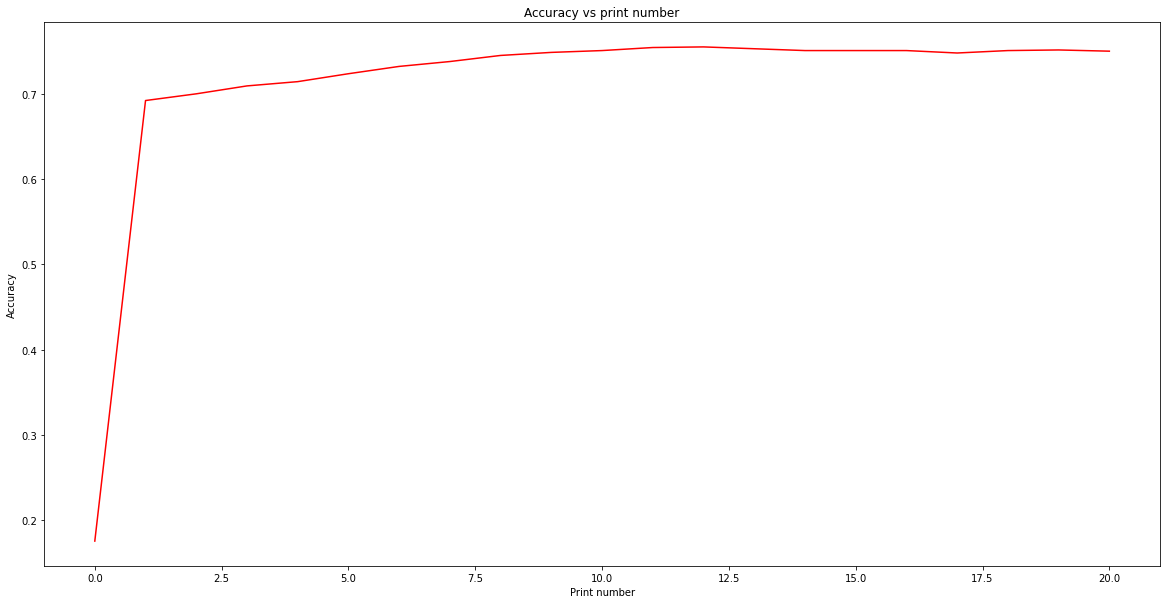

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(accs1, color="red")

plt.xlabel("Print number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs print number for lr=0.1")
plt.show()

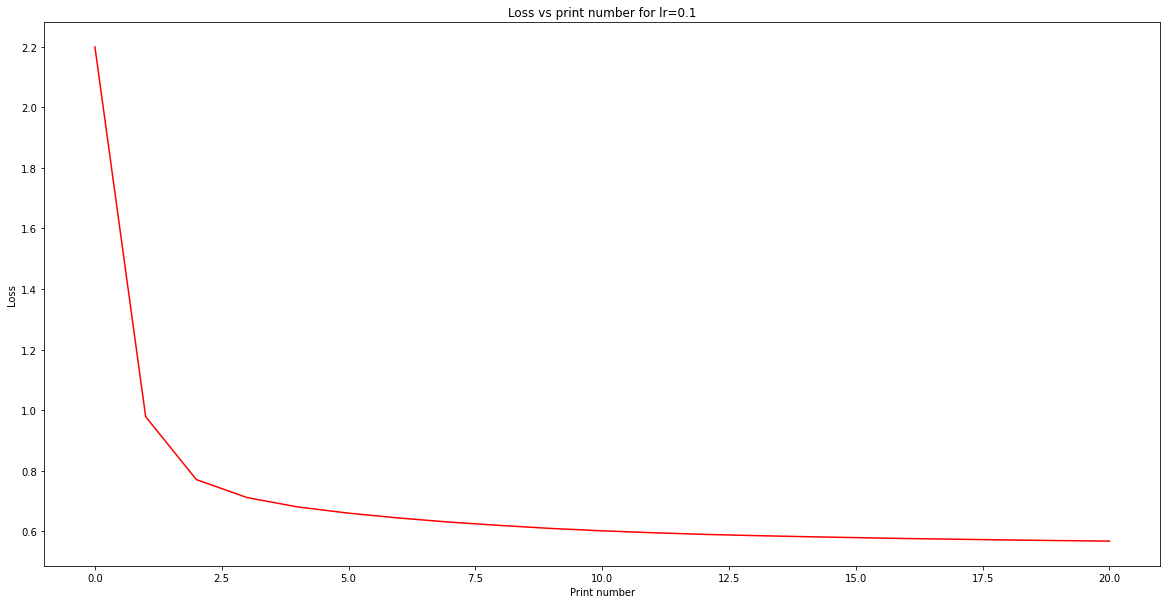

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(losses1, color="red")

plt.xlabel("Print number")
plt.ylabel("Loss")
plt.title("Loss vs print number for lr=0.1")
plt.show()

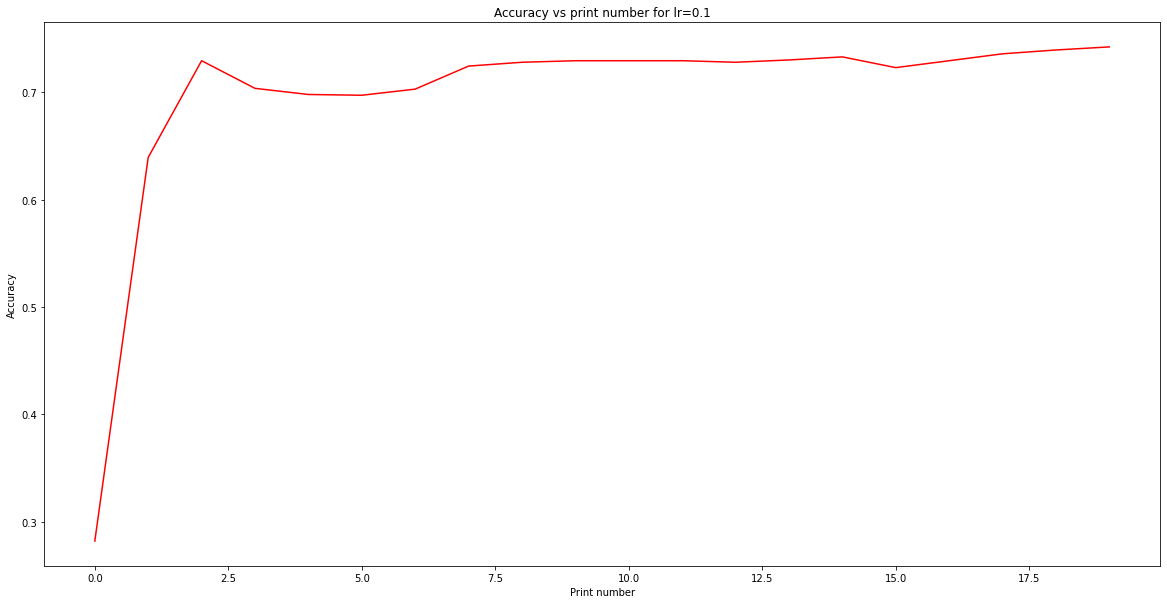

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(accs2, color="red")

plt.xlabel("Print number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs print number for lr=0.1 (NN with 2 hls)")
plt.show()

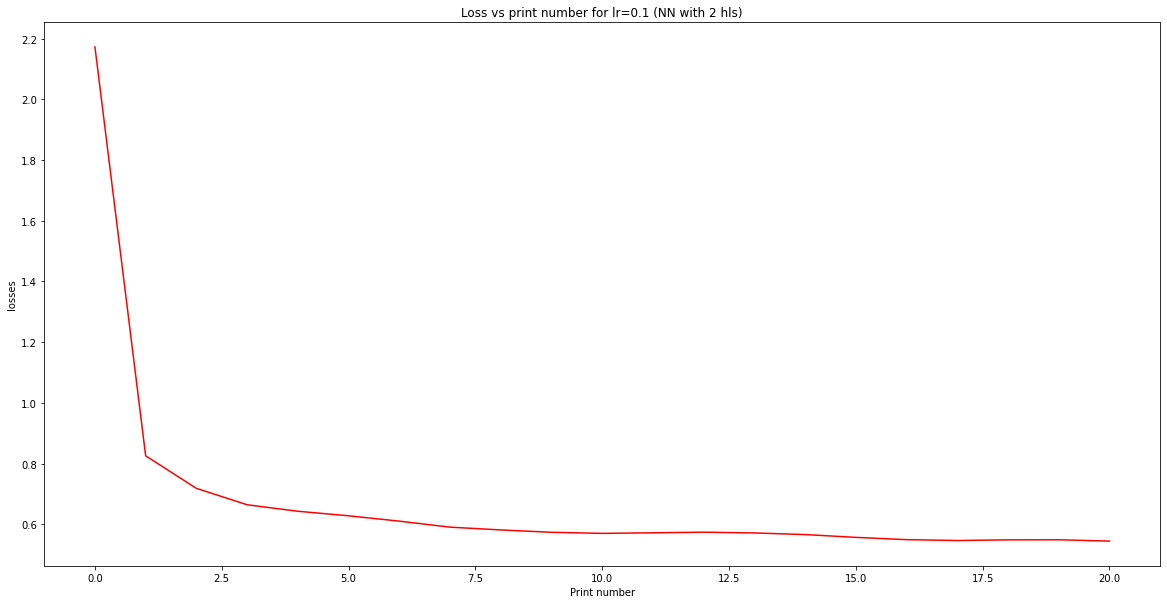

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(losses2, color="red")

plt.xlabel("Print number")
plt.ylabel("losses")
plt.title("Loss vs print number for lr=0.1 (NN with 2 hls)")
plt.show()

In [ ]:
W1, b1, W2, b2, accs105, losses105 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.05, 100)

Accuracy after epoch 0  =  0.2835714285714286
Cost after epoch 0  =  2.237872646101533
Accuracy after epoch 50  =  0.6471428571428571
Cost after epoch 50  =  1.2942994836053952
Accuracy after epoch 100  =  0.7028571428571428
Cost after epoch 100  =  0.9670088826716637
Accuracy after epoch 150  =  0.7085714285714285
Cost after epoch 150  =  0.8257715373057668
Accuracy after epoch 200  =  0.7121428571428572
Cost after epoch 200  =  0.76127243165431
Accuracy after epoch 250  =  0.7121428571428572
Cost after epoch 250  =  0.7261577690616103
Accuracy after epoch 300  =  0.7178571428571429
Cost after epoch 300  =  0.7039166308357079
Accuracy after epoch 350  =  0.72
Cost after epoch 350  =  0.6876875906472748
Accuracy after epoch 400  =  0.7221428571428572
Cost after epoch 400  =  0.6747468403182473
Accuracy after epoch 450  =  0.7228571428571429
Cost after epoch 450  =  0.6638846434796902
Accuracy after epoch 500  =  0.725
Cost after epoch 500  =  0.6543700540393766
Accuracy after epoch 550

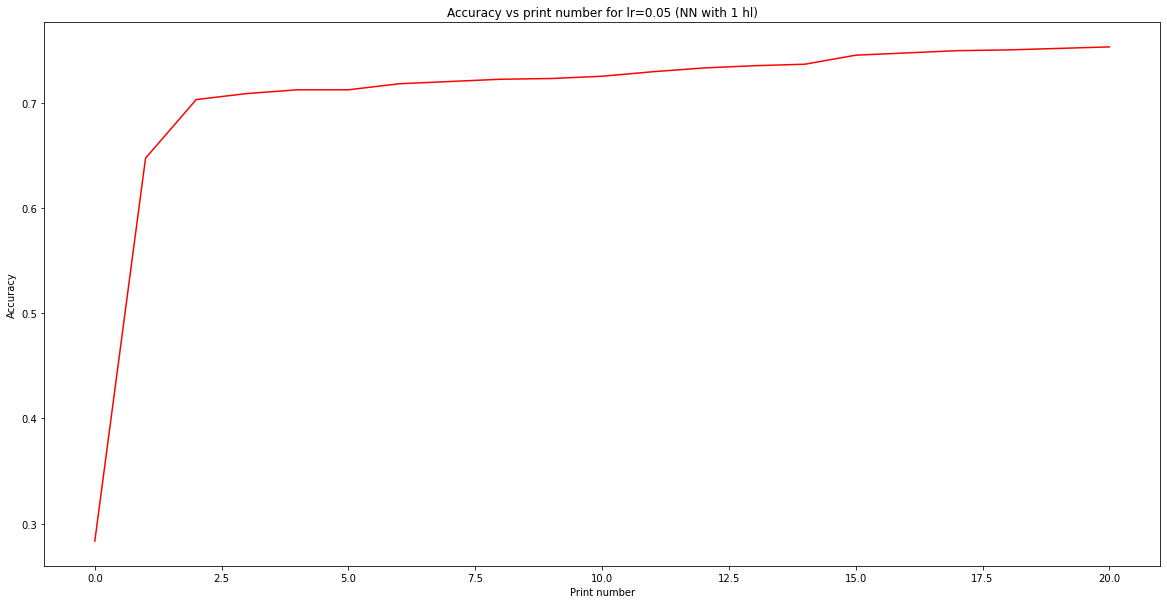

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(accs105, color="red")

plt.xlabel("Print number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs print number for lr=0.05 (NN with 1 hl)")
plt.show()

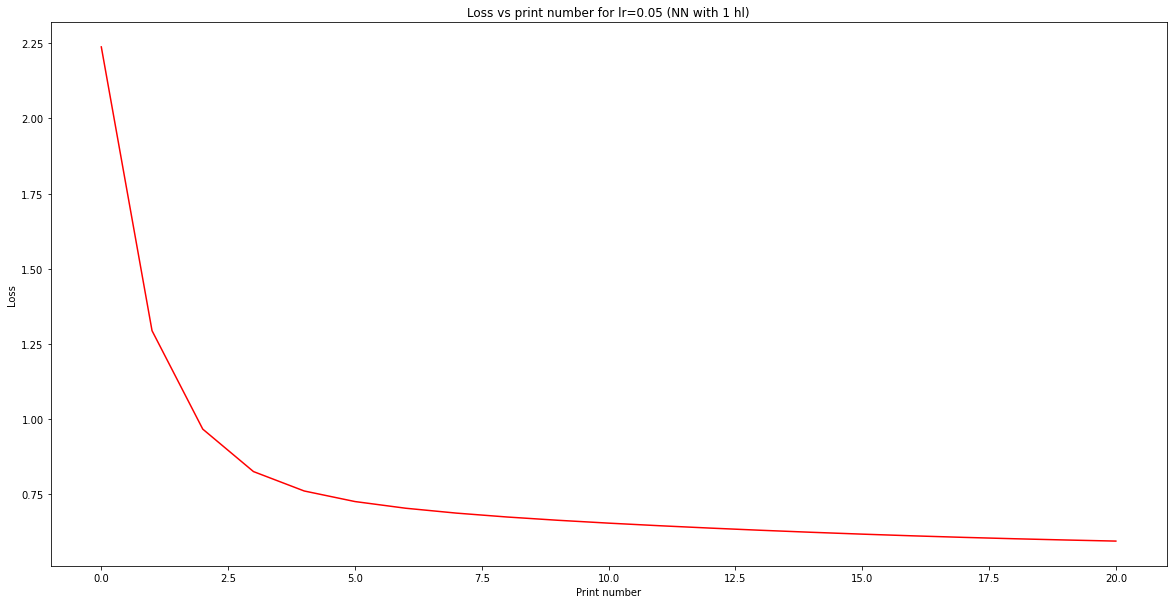

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(losses105, color="red")

plt.xlabel("Print number")
plt.ylabel("Loss")
plt.title("Loss vs print number for lr=0.05 (NN with 1 hl)")
plt.show()

In [ ]:
#mini-batch gradient descent applied on 2 hidden layers
W1, b1, W2, b2, W3, b3, accs205, losses205 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.05, 100)

Accuracy at epoch 0  =  0.22
Loss at epoch  0  =  2.1466803085554487
Accuracy at epoch 50  =  0.6157142857142858
Loss at epoch  50  =  1.1203165099458878
Accuracy at epoch 100  =  0.615
Loss at epoch  100  =  0.9555184431322591
Accuracy at epoch 150  =  0.7085714285714285
Loss at epoch  150  =  0.8058657309295238
Accuracy at epoch 200  =  0.7242857142857143
Loss at epoch  200  =  0.7294197947090233
Accuracy at epoch 250  =  0.7328571428571429
Loss at epoch  250  =  0.6888070010937483
Accuracy at epoch 300  =  0.7364285714285714
Loss at epoch  300  =  0.6606287267805696
Accuracy at epoch 350  =  0.7378571428571429
Loss at epoch  350  =  0.6448625248104684
Accuracy at epoch 400  =  0.7378571428571429
Loss at epoch  400  =  0.6436210373071931
Accuracy at epoch 450  =  0.7457142857142857
Loss at epoch  450  =  0.6402470411334737
Accuracy at epoch 500  =  0.7428571428571429
Loss at epoch  500  =  0.6362273662885877
Accuracy at epoch 550  =  0.7407142857142858
Loss at epoch  550  =  0.636540

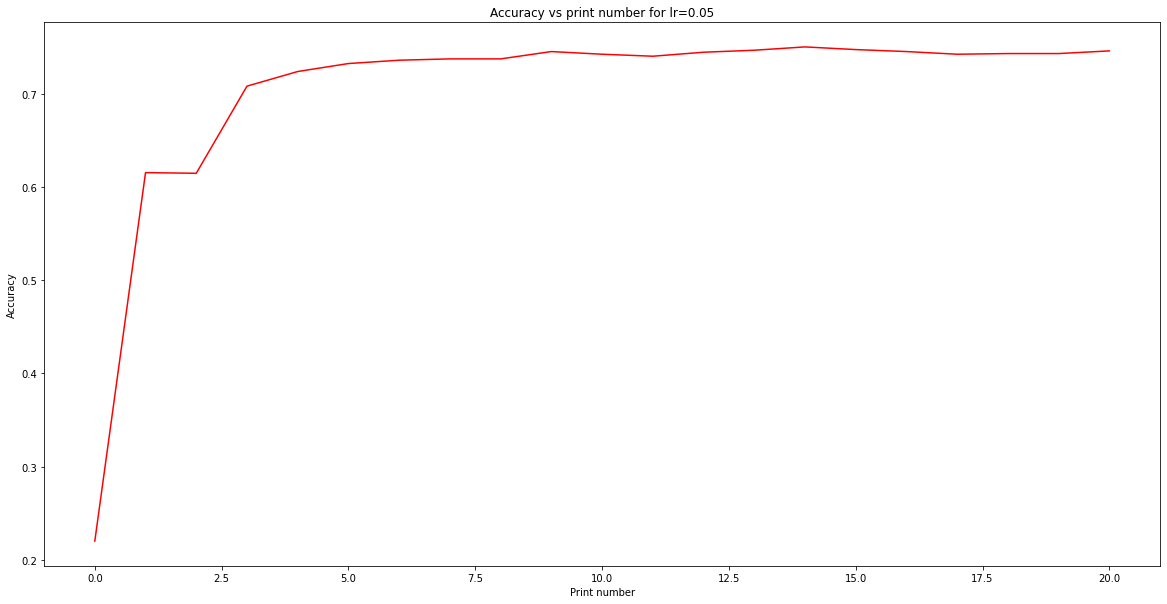

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(accs205, color="red")

plt.xlabel("Print number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs print number for lr=0.05 (NN with 2 hls)")
plt.show()

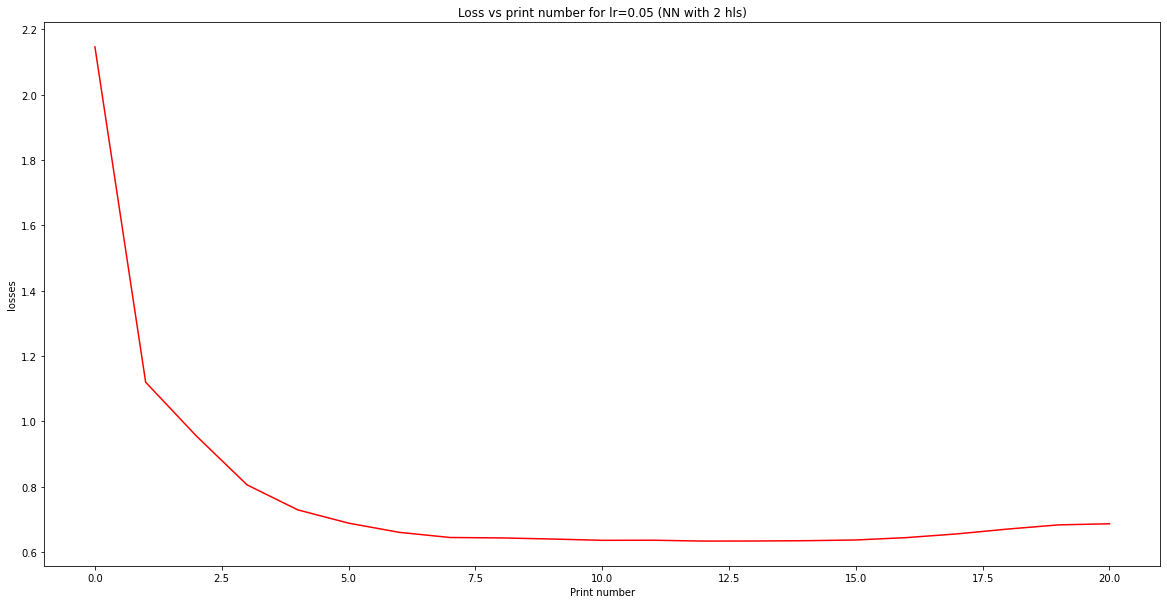

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(losses205, color="red")

plt.xlabel("Print number")
plt.ylabel("losses")
plt.title("Loss vs print number for lr=0.05 (NN with 2 hls)")
plt.show()

In [ ]:
W1, b1, W2, b2, accs102, losses102 = nn_batch_descent_1(x_train_norm, y_train_norm, 1000, 0.2, 100)

Accuracy after epoch 0  =  0.1992857142857143
Cost after epoch 0  =  2.21136000673772
Accuracy after epoch 50  =  0.7007142857142857
Cost after epoch 50  =  0.7378157064223562
Accuracy after epoch 100  =  0.7242857142857143
Cost after epoch 100  =  0.6611397578034472
Accuracy after epoch 150  =  0.7421428571428571
Cost after epoch 150  =  0.6221324114535354
Accuracy after epoch 200  =  0.7442857142857143
Cost after epoch 200  =  0.604861563622049
Accuracy after epoch 250  =  0.7514285714285714
Cost after epoch 250  =  0.5839686590064944
Accuracy after epoch 300  =  0.7492857142857143
Cost after epoch 300  =  0.5756173538113059
Accuracy after epoch 350  =  0.7514285714285714
Cost after epoch 350  =  0.5709731111765631
Accuracy after epoch 400  =  0.7528571428571429
Cost after epoch 400  =  0.5677475724694975
Accuracy after epoch 450  =  0.755
Cost after epoch 450  =  0.5649670962194231
Accuracy after epoch 500  =  0.7571428571428571
Cost after epoch 500  =  0.5630444323884141
Accuracy a

In [ ]:
W1, b1, W2, b2, W3, b3, accs202, losses202 = nn_batch_descent_2(x_train_norm, y_train_norm, 1000, 0.2, 100)

Accuracy at epoch 0  =  0.32785714285714285
Loss at epoch  0  =  2.23646885263704
Accuracy at epoch 50  =  0.7042857142857143
Loss at epoch  50  =  0.8788058870983332
Accuracy at epoch 100  =  0.6864285714285714
Loss at epoch  100  =  1.9265554118431467
Accuracy at epoch 150  =  0.7042857142857143
Loss at epoch  150  =  1.1402284984420525
Accuracy at epoch 200  =  0.6964285714285714
Loss at epoch  200  =  1.41852471293866
Accuracy at epoch 250  =  0.7292857142857143
Loss at epoch  250  =  0.862473612523198
Accuracy at epoch 300  =  0.7385714285714285
Loss at epoch  300  =  0.7133060294221667
Accuracy at epoch 350  =  0.7307142857142858
Loss at epoch  350  =  0.7718940264157191
Accuracy at epoch 400  =  0.7385714285714285
Loss at epoch  400  =  0.7173019733782126
Accuracy at epoch 450  =  0.7471428571428571
Loss at epoch  450  =  0.6659323394973092
Accuracy at epoch 500  =  0.7435714285714285
Loss at epoch  500  =  0.7043183533718376
Accuracy at epoch 550  =  0.755
Loss at epoch  550  =

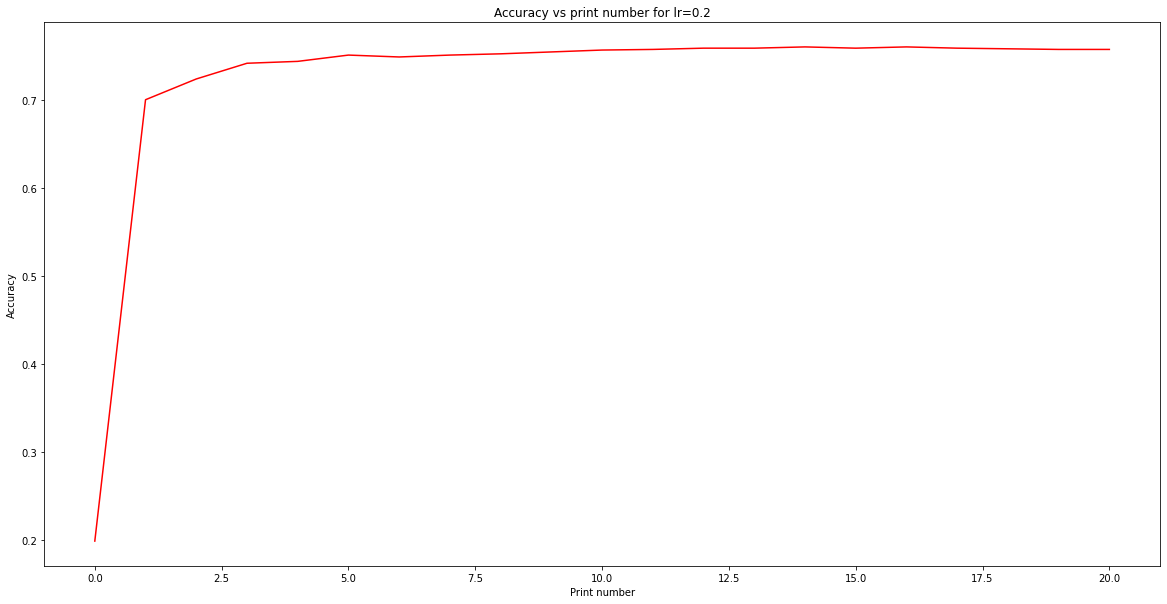

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(accs102, color="red")

plt.xlabel("Print number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs print number for lr=0.2")
plt.show()

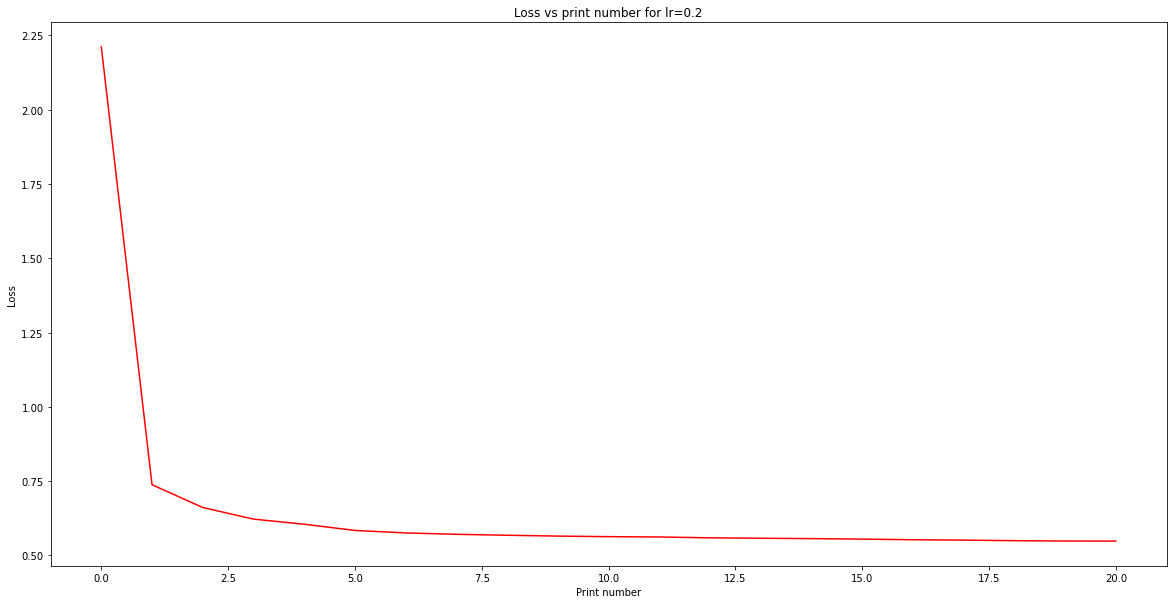

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(losses102, color="red")

plt.xlabel("Print number")
plt.ylabel("Loss")
plt.title("Loss vs print number for lr=0.2")
plt.show()

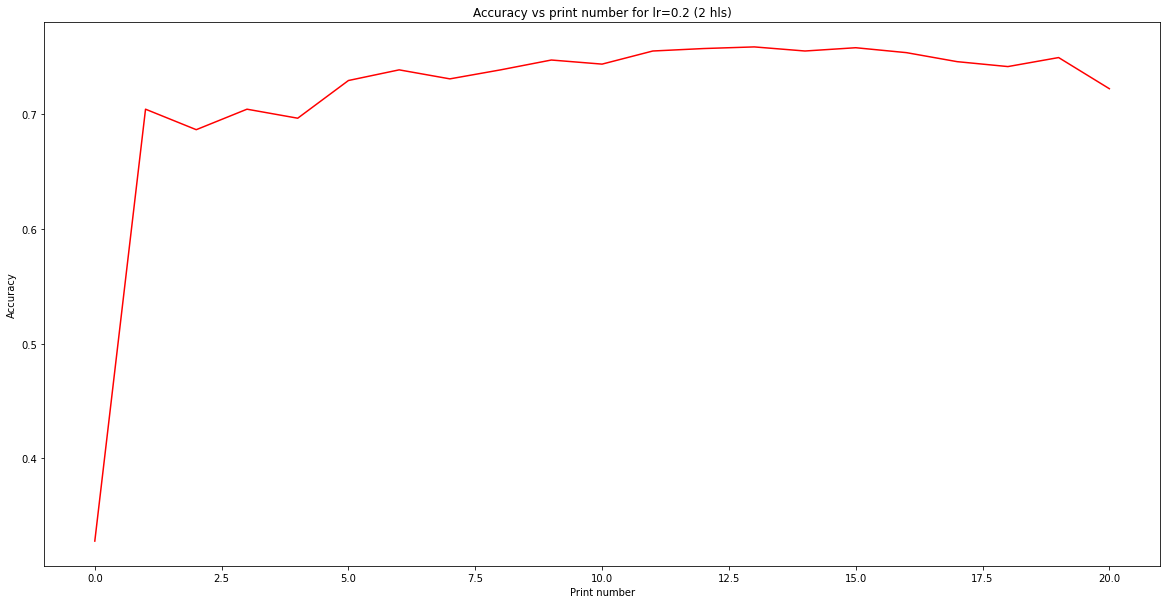

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(accs202, color="red")

plt.xlabel("Print number")
plt.ylabel("Accuracy")
plt.title("Accuracy vs print number for lr=0.2 (2 hls)")
plt.show()

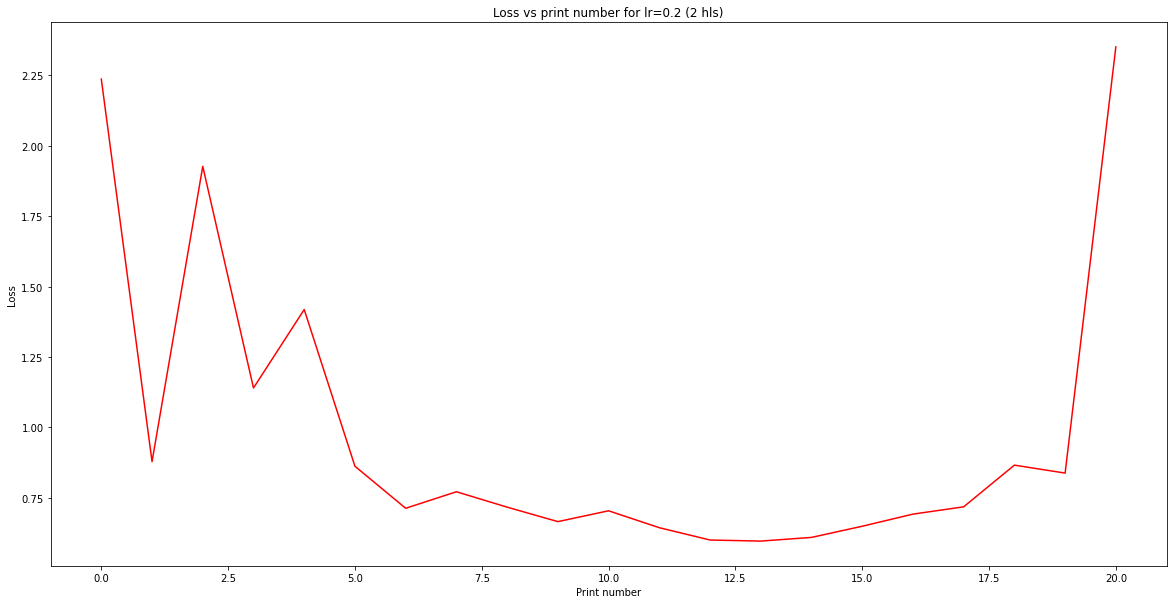

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(losses202, color="red")

plt.xlabel("Print number")
plt.ylabel("Loss")
plt.title("Loss vs print number for lr=0.2 (2 hls)")
plt.show()